In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install plotly


In [3]:
import sys
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3


In [4]:
import sys
!{sys.executable} -m pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.8 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 9.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [57]:
df = pd.read_csv("/Users/dianamazuera/Desktop/ICESI/SEMESTRE_1/ANALISIS_EXPLORATORIO_DATOS/TRABAJO/ACTIVIDAD/analisis-exploratorio/Taller 2/data/sleep_cycle_productivity.csv")
df.head(10)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
5,2024-07-08,7439,38,Male,21.77,6.41,8.64,10,88,251,123,6.207993,1,9,7
6,2024-01-09,6463,18,Other,22.83,6.87,8.03,3,34,288,122,4.592357,7,10,9
7,2024-01-28,7278,26,Female,20.78,3.14,6.35,8,36,98,171,9.100460,3,1,3
8,2024-04-10,9110,31,Other,20.07,3.37,7.31,7,26,206,14,4.887127,3,7,1
9,2024-02-21,6116,49,Female,20.37,3.89,7.52,4,12,159,70,6.318012,6,2,10


In [58]:
# Mostrar información general del dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

(None,
          Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
 0  2024-04-12       1860   32   Other             23.33            4.61   
 1  2024-11-04       1769   41  Female             21.02            2.43   
 2  2024-08-31       2528   20    Male             22.10            3.45   
 3  2024-02-22       8041   37   Other             23.10            6.65   
 4  2024-02-23       4843   46   Other             21.42            4.17   
 
    Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
 0               5.28              3                   86   
 1               5.41              5                   32   
 2               5.35              7                   17   
 3               7.55              8                   46   
 4               6.75             10                   61   
 
    Caffeine Intake (mg)  Screen Time Before Bed (mins)  Work Hours (hrs/day)  \
 0                    87                            116              8.808920   
 1   

In [59]:
print(df.columns)  # nombres de las columnas en el DataFrame

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')


In [60]:
df = df.drop("Date", axis=1)


In [61]:
print(df.columns)  # nombres de las columnas en el DataFrame

Index(['Person_ID', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score',
       'Stress Level'],
      dtype='object')


In [62]:
# Convertir 'Gender' a numérico con codificación ordinal
df['Gender'] = df['Gender'].astype('category').cat.codes
# Ver los cambios antes de la estandarización
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,1860,32,2,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,1769,41,0,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2528,20,1,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,8041,37,2,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,4843,46,2,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [63]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [64]:
numeric_cols = df.select_dtypes(include=['number']).columns

from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns  

# Aplicar Z-score (Estandarización)
scaler = StandardScaler()
df_scaled = df.copy()  # Crear una copia del DataFrame original
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Mostrar los primeros datos normalizados
df_scaled.head(10)


,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,-1.413089,-0.535753,1.251248,1.144430,-0.198817,-1.165773,-0.880303,1.629612,-0.695752,0.471998,0.360819,0.820283,-0.836043,0.156503
1,-1.448154,0.195861,-1.217671,-0.851292,-1.369399,-1.076357,-0.181872,-0.463739,-1.464778,-0.065699,-0.728647,1.516678,-0.836043,0.502747
2,-1.155684,-1.511238,0.016789,0.081773,-0.821696,-1.117626,0.516560,-1.045226,-0.684100,-0.622600,0.227832,1.516678,1.279986,1.541482
3,0.968678,-0.129301,1.251248,0.945722,0.896590,0.395559,0.865776,0.078981,-1.313304,-0.219327,-0.842728,0.820283,-0.483372,-1.228476
4,-0.263629,0.602313,1.251248,-0.505713,-0.435082,-0.154690,1.564208,0.660468,1.424896,0.049522,1.488513,0.820283,0.574643,1.195237
5,0.736705,-0.048010,0.016789,-0.203330,0.767718,1.145273,1.564208,1.707143,1.215162,0.606423,-0.782191,-1.617098,1.279986,0.502747
6,0.360617,-1.673819,1.251248,0.712456,1.014722,0.725708,-0.880303,-0.386208,1.646283,0.587219,-1.492202,0.472086,1.632658,1.195237
7,0.674666,-1.023495,-1.217671,-1.058640,-0.988155,-0.429815,0.865776,-0.308676,-0.567581,1.528189,0.488940,-0.920704,-1.541386,-0.882232
8,1.380603,-0.617043,1.251248,-1.672044,-0.864653,0.230484,0.516560,-0.696334,0.690826,-1.486756,-1.362662,-0.920704,0.574643,-1.574721
9,0.226905,0.846185,-1.217671,-1.412859,-0.585432,0.374925,-0.531087,-1.239054,0.143186,-0.411361,-0.733842,0.123889,-1.188715,1.541482


In [65]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar Min-Max Scaling (0 a 1)
scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Mostrar los primeros datos normalizados
df_scaled.head(10)


,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,0.095577,0.341463,1.0,0.836683,0.457111,0.156,0.222222,0.966292,0.290970,0.648045,0.601176,0.777778,0.222222,0.555556
1,0.085463,0.560976,0.0,0.256281,0.211061,0.182,0.444444,0.359551,0.070234,0.491620,0.291254,1.000000,0.222222,0.666667
2,0.169816,0.048780,0.5,0.527638,0.326185,0.170,0.666667,0.191011,0.294314,0.329609,0.563345,1.000000,0.888889,1.000000
3,0.782507,0.463415,1.0,0.778894,0.687359,0.610,0.777778,0.516854,0.113712,0.446927,0.258802,0.777778,0.333333,0.111111
4,0.427095,0.682927,1.0,0.356784,0.407449,0.450,1.000000,0.685393,0.899666,0.525140,0.921973,0.777778,0.666667,0.888889
5,0.715603,0.487805,0.5,0.444724,0.660271,0.828,1.000000,0.988764,0.839465,0.687151,0.276023,0.000000,0.888889,0.666667
6,0.607135,0.000000,1.0,0.711055,0.712190,0.706,0.222222,0.382022,0.963211,0.681564,0.074045,0.666667,1.000000,0.888889
7,0.697711,0.195122,0.0,0.195980,0.291196,0.370,0.777778,0.404494,0.327759,0.955307,0.637623,0.222222,0.000000,0.222222
8,0.901311,0.317073,1.0,0.017588,0.317156,0.562,0.666667,0.292135,0.688963,0.078212,0.110895,0.222222,0.666667,0.000000
9,0.568571,0.756098,0.0,0.092965,0.375847,0.604,0.333333,0.134831,0.531773,0.391061,0.289777,0.555556,0.111111,1.000000


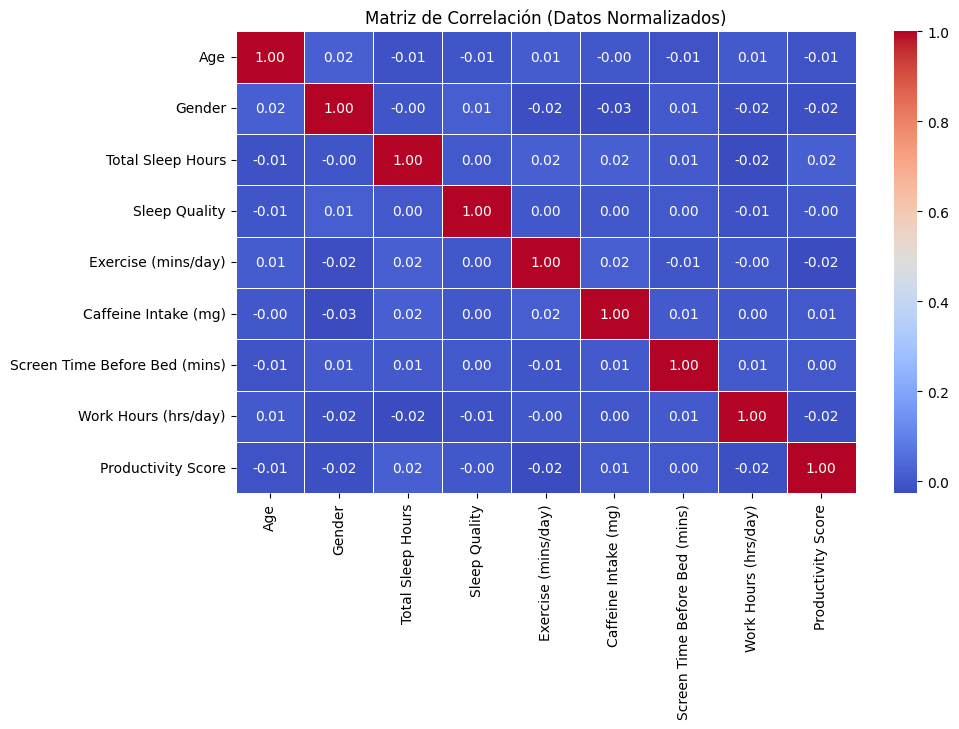

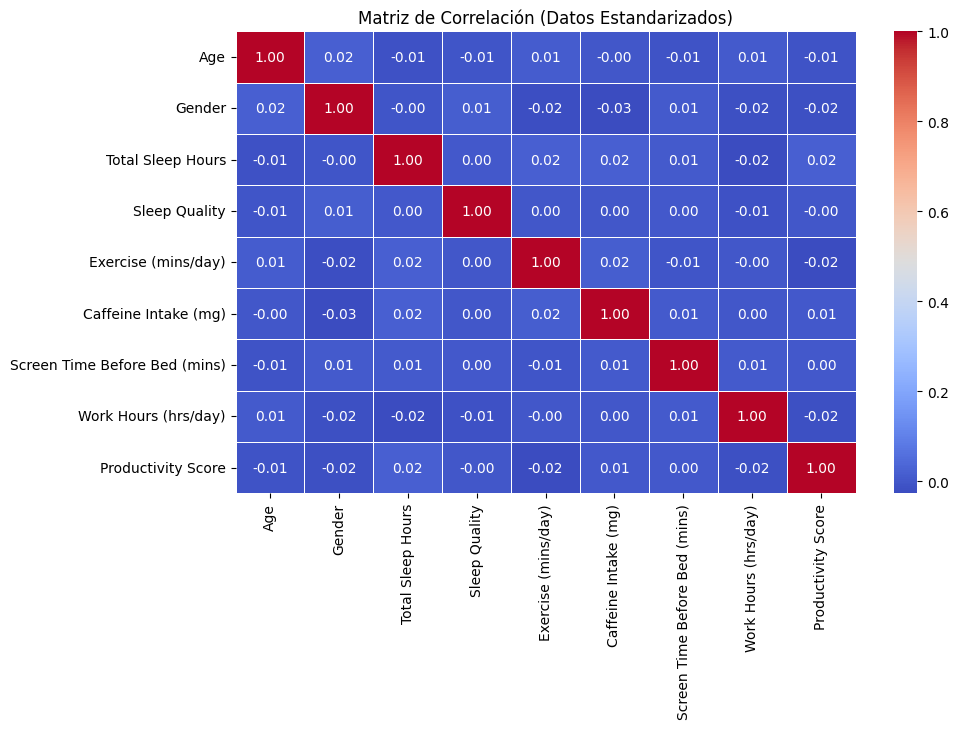

In [66]:
# Seleccionar solo las columnas numéricas que queremos analizar
selected_cols = ['Age', 'Gender', 'Total Sleep Hours', 'Sleep Quality', 
                 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
                 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 
                 'Productivity Score']

# Copia del DataFrame original con solo las columnas necesarias
df_selected = df[selected_cols].copy()

# Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalized = df_selected.copy()
df_normalized[selected_cols] = scaler_minmax.fit_transform(df_selected[selected_cols])

# Estandarización (Z-score)
scaler_standard = StandardScaler()
df_standardized = df_selected.copy()
df_standardized[selected_cols] = scaler_standard.fit_transform(df_selected[selected_cols])

# Función para graficar la matriz de correlación
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Graficar correlación con datos normalizados
plot_correlation_matrix(df_normalized, "Matriz de Correlación (Datos Normalizados)")

# Graficar correlación con datos estandarizados
plot_correlation_matrix(df_standardized, "Matriz de Correlación (Datos Estandarizados)")

In [86]:
df = df.drop(columns=["Sleep Start Time", "Sleep End Time"])



In [87]:
print(df.columns)
df.head(10)

Index(['Age', 'Gender', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level',
       'Productivity_Class'],
      dtype='object')


,Age,Gender,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Productivity_Class
0,32,2,5.28,3,86,87,116,8.808920,8,3,6,1
1,41,0,5.41,5,32,21,88,6.329833,10,3,7,1
2,20,1,5.35,7,17,88,59,8.506306,10,9,10,1
3,37,2,7.55,8,46,34,80,6.070240,8,4,2,1
4,46,2,6.75,10,61,269,94,11.374994,8,7,9,1
5,38,1,8.64,10,88,251,123,6.207993,1,9,7,0
6,18,2,8.03,3,34,288,122,4.592357,7,10,9,1
7,26,0,6.35,8,36,98,171,9.100460,3,1,3,0
8,31,2,7.31,7,26,206,14,4.887127,3,7,1,0
9,49,0,7.52,4,12,159,70,6.318012,6,2,10,0


In [91]:

# Obtener estadísticas generales
print(df.describe())  # Muestra estadísticas de las columnas numéricas

# Ver información de tipos de datos y valores nulos
print(df.info())

# Ver cantidad de valores nulos por columna
print(df.isnull().sum())

               Age       Gender  Total Sleep Hours  Sleep Quality  \
count  5000.000000  5000.000000        5000.000000    5000.000000   
mean     38.590600     0.986400           6.974902       5.520800   
std      12.302799     0.810152           1.454033       2.863845   
min      18.000000     0.000000           4.500000       1.000000   
25%      28.000000     0.000000           5.690000       3.000000   
50%      39.000000     1.000000           6.960000       5.000000   
75%      49.000000     2.000000           8.210000       8.000000   
max      59.000000     2.000000           9.500000      10.000000   

       Exercise (mins/day)  Caffeine Intake (mg)  \
count          5000.000000            5000.00000   
mean             43.962600             146.71140   
std              25.798541              85.83139   
min               0.000000               0.00000   
25%              22.000000              73.00000   
50%              44.000000             144.00000   
75%           

In [92]:
df.isnull().sum()

Age                              0
Gender                           0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
Productivity_Class               0
dtype: int64

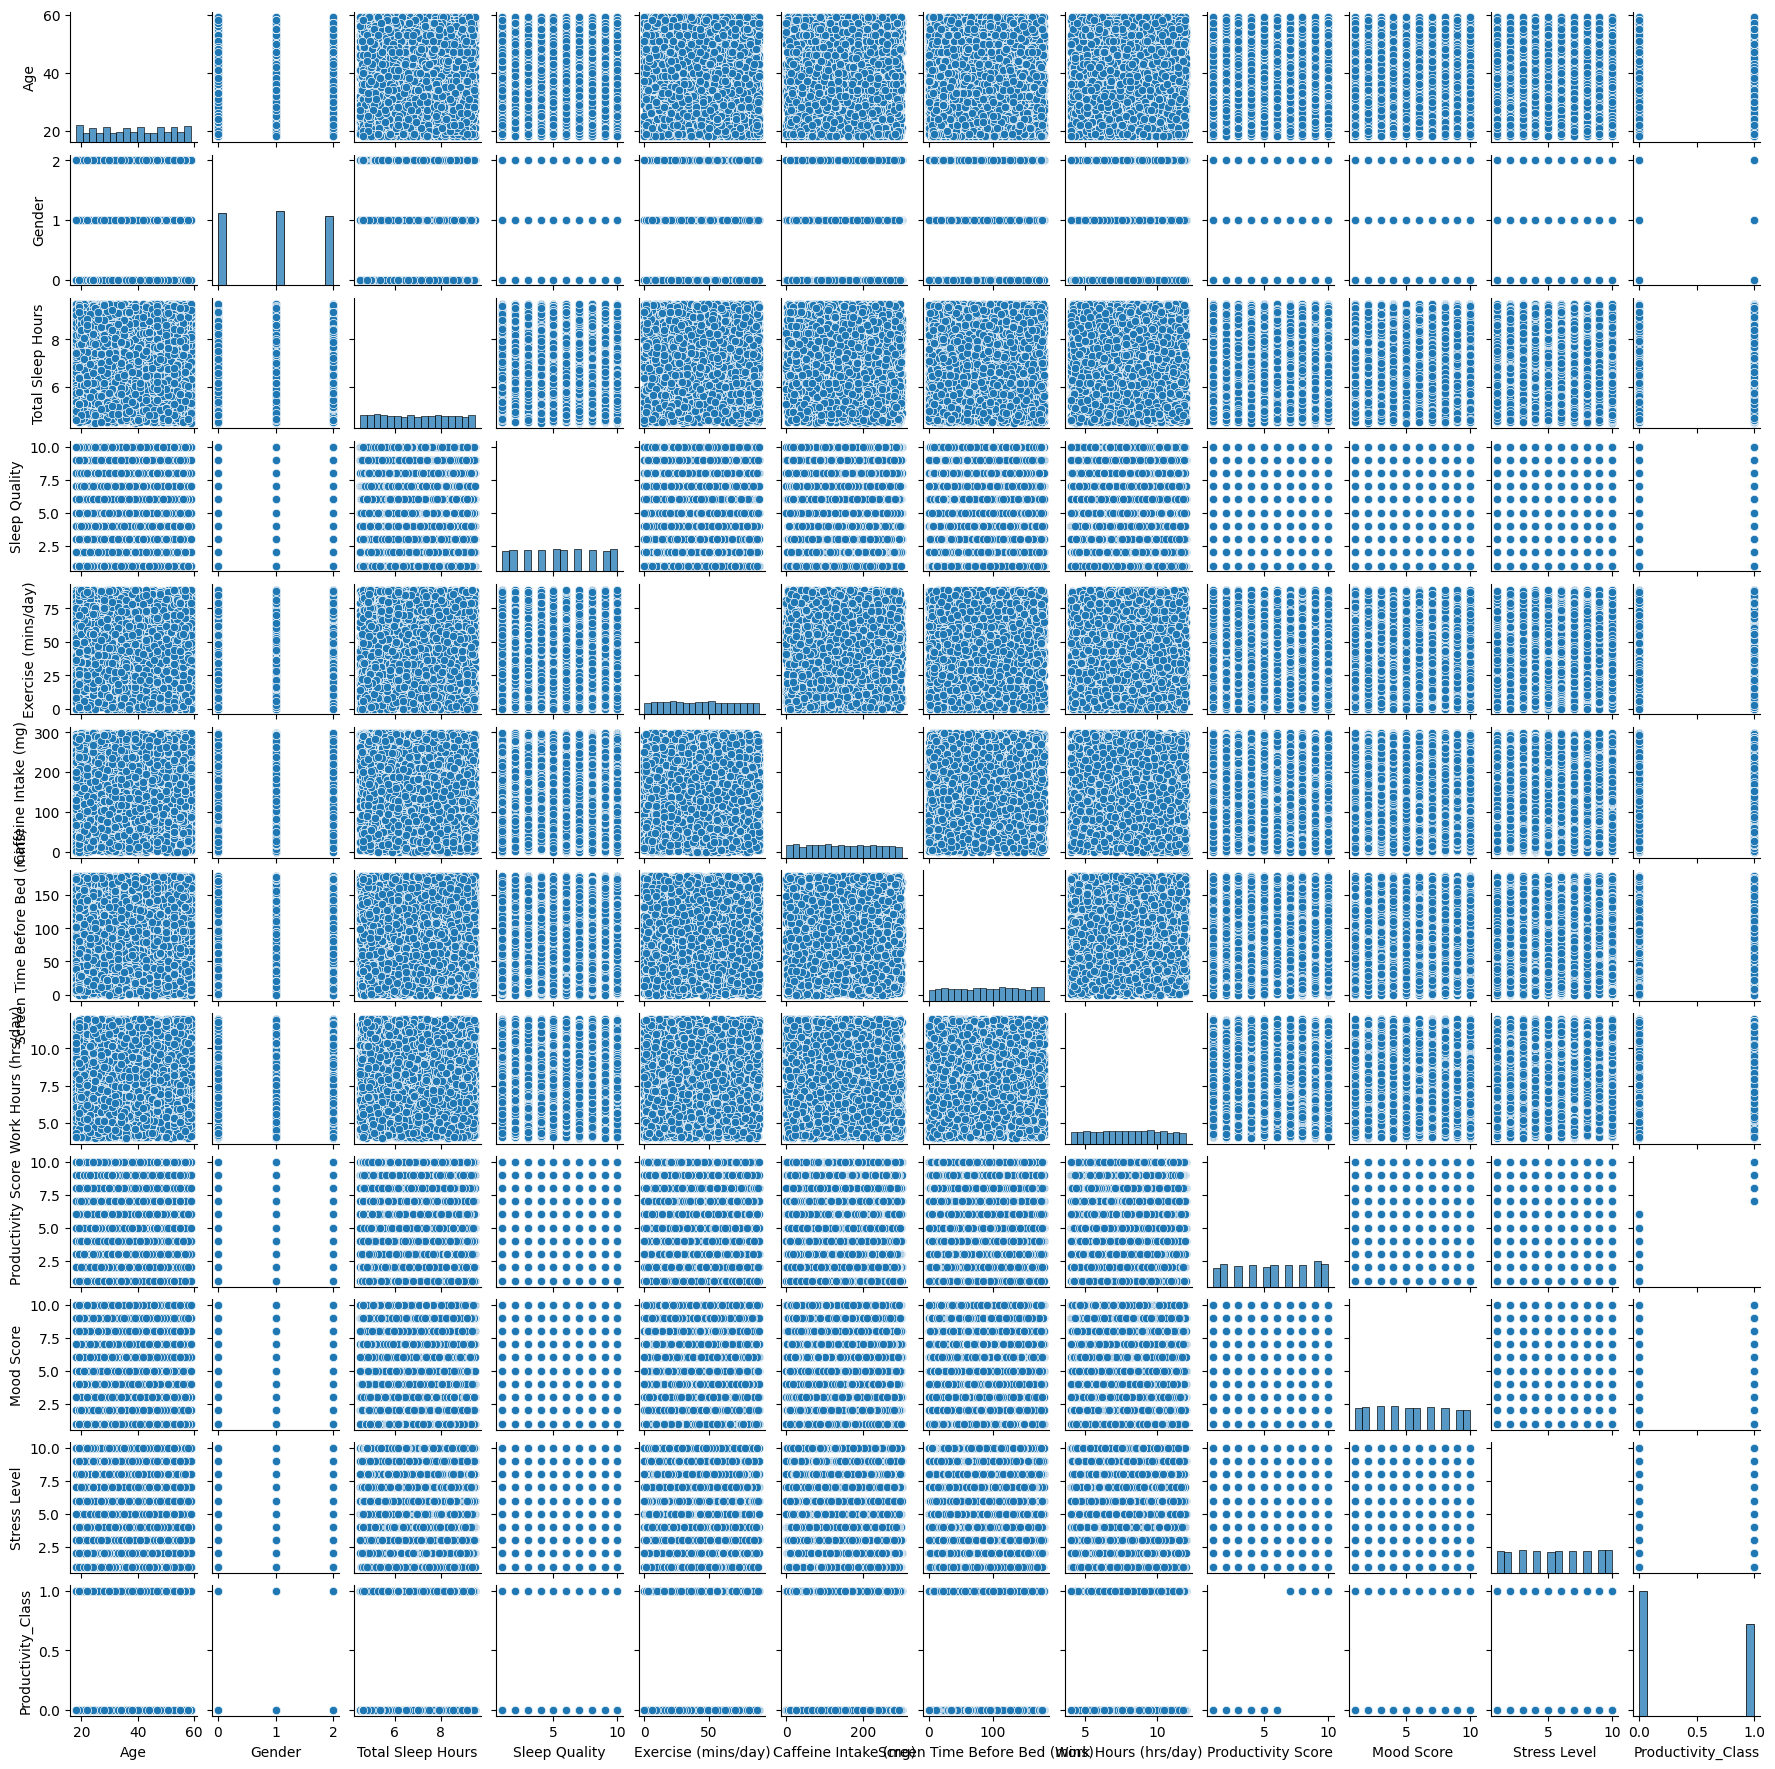

In [93]:
sns.pairplot(df, height=1.5)


Accuracy: 0.577
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       577
           1       0.00      0.00      0.00       423

    accuracy                           0.58      1000
   macro avg       0.29      0.50      0.37      1000
weighted avg       0.33      0.58      0.42      1000



/Users/dianamazuera/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dianamazuera/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dianamazuera/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

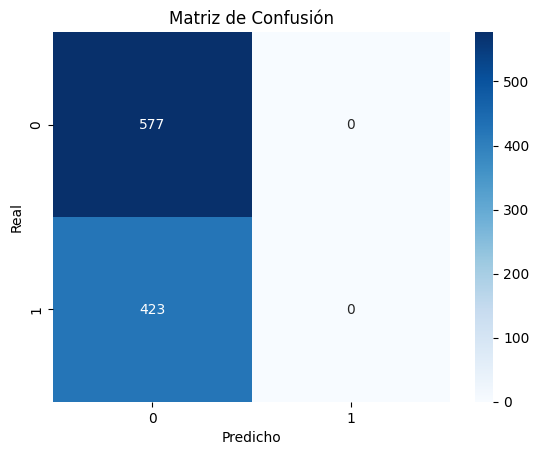

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Definir variable objetivo (Productividad Alta/Baja)
umbral = df['Productivity Score'].median()  # Puedes cambiarlo
df['Productivity_Class'] = (df['Productivity Score'] > umbral).astype(int)

# Seleccionar características (ajusta según la correlación)
X = df[['Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Work Hours (hrs/day)']]
y = df['Productivity_Class']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
